## 1.DATA COLLECTION

In [7]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv('https://query.data.world/s/m3ptbyyed6lpeb3q3xrpeyghova7cz?dws=00000')

In [2]:
df.head()

tweet_id   sentiment       author  \
0  1956967341       empty   xoshayzers   
1  1956967666     sadness    wannamama   
2  1956967696     sadness    coolfunky   
3  1956967789  enthusiasm  czareaquino   
4  1956968416     neutral    xkilljoyx   

                                             content  
0  @tiffanylue i know  i was listenin to bad habi...  
1  Layin n bed with a headache  ughhhh...waitin o...  
2                Funeral ceremony...gloomy friday...  
3               wants to hang out with friends SOON!  
4  @dannycastillo We want to trade with someone w...

## 2. DATA PREPROCESSING
####  Cleaning and transforming the dataset

In [ ]:
def clean_text(text):
    if isinstance(text, str):
        # Removing URLs
        text = re.sub(r'http\S+', '', text)
        # Removing special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Converting to lowercase
        text = text.lower()
        # Removing extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    return ""

# Applying text cleaning
df['clean_content'] = df['content'].apply(clean_text)


- downloading neccesary packages from natural language tool kit


In [5]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Removing stopwords and lemmatization

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def remove_stopwords_and_lemmatize(text):
    if isinstance(text, str):
        words = text.split()
        words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
        return ' '.join(words)
    return ""

df['processed_content'] = df['clean_content'].apply(remove_stopwords_and_lemmatize)

## 3. EXPLORATORY DATA ANALYSIS

#### a) 

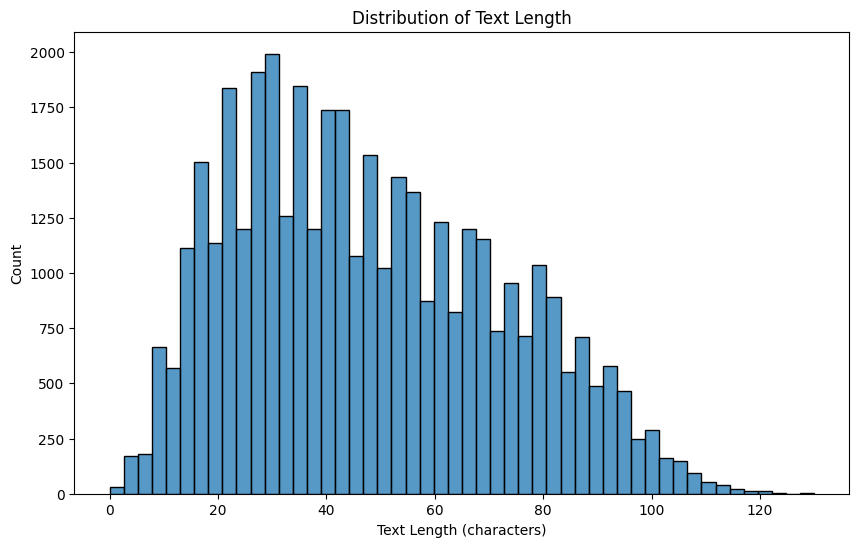

In [9]:
df['text_length'] = df['processed_content'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length (characters)')
plt.ylabel('Count')
plt.show()

### b) Sentiment label distribution

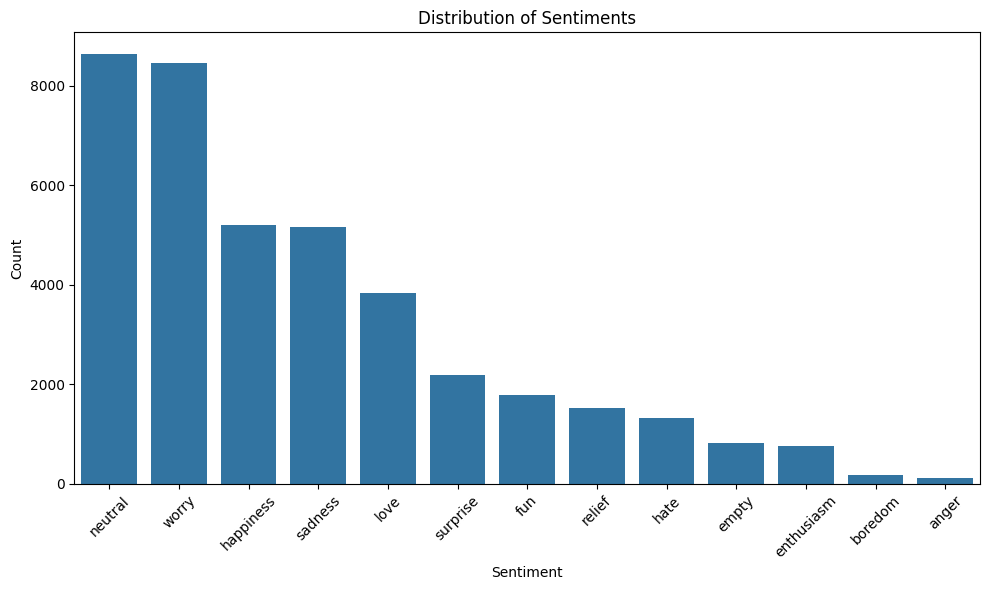

In [ ]:
plt.figure(figsize=(10, 6))
sentiment_counts = df['sentiment'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribution of Sentiments')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Word frequency analysis
def get_top_words(text_series, top_n=20):
    all_words = ' '.join(text_series.dropna()).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(top_n)

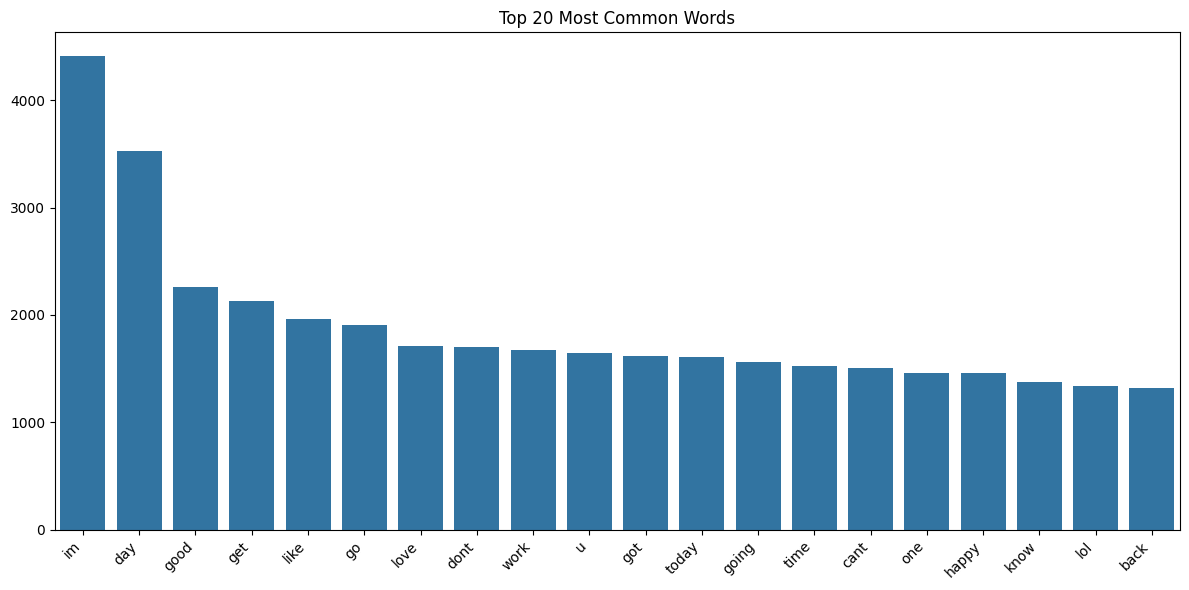

In [11]:
# Overall word frequency
top_words = get_top_words(df['processed_content'])
plt.figure(figsize=(12, 6))
words, counts = zip(*top_words)
sns.barplot(x=list(words), y=list(counts))
plt.title('Top 20 Most Common Words')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Word frequency by sentiment

C:\Users\USER\AppData\Local\Temp\ipykernel_8220\1996173018.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(words, rotation=45, ha='right')


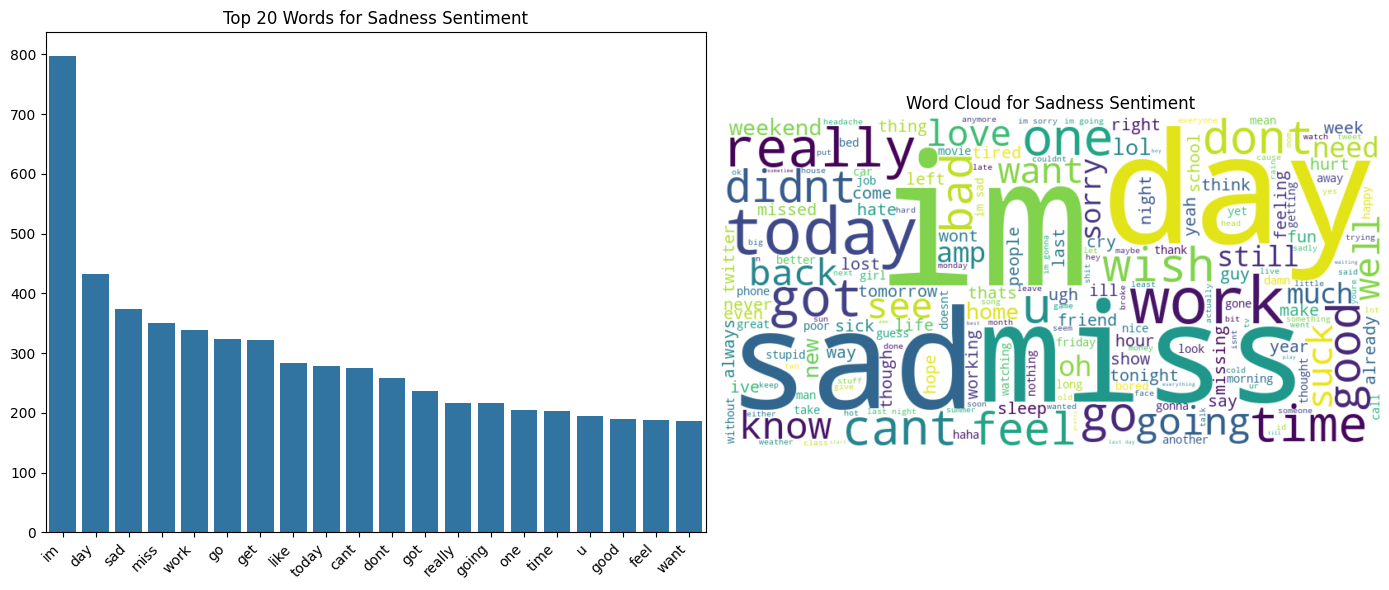

C:\Users\USER\AppData\Local\Temp\ipykernel_8220\1996173018.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(words, rotation=45, ha='right')


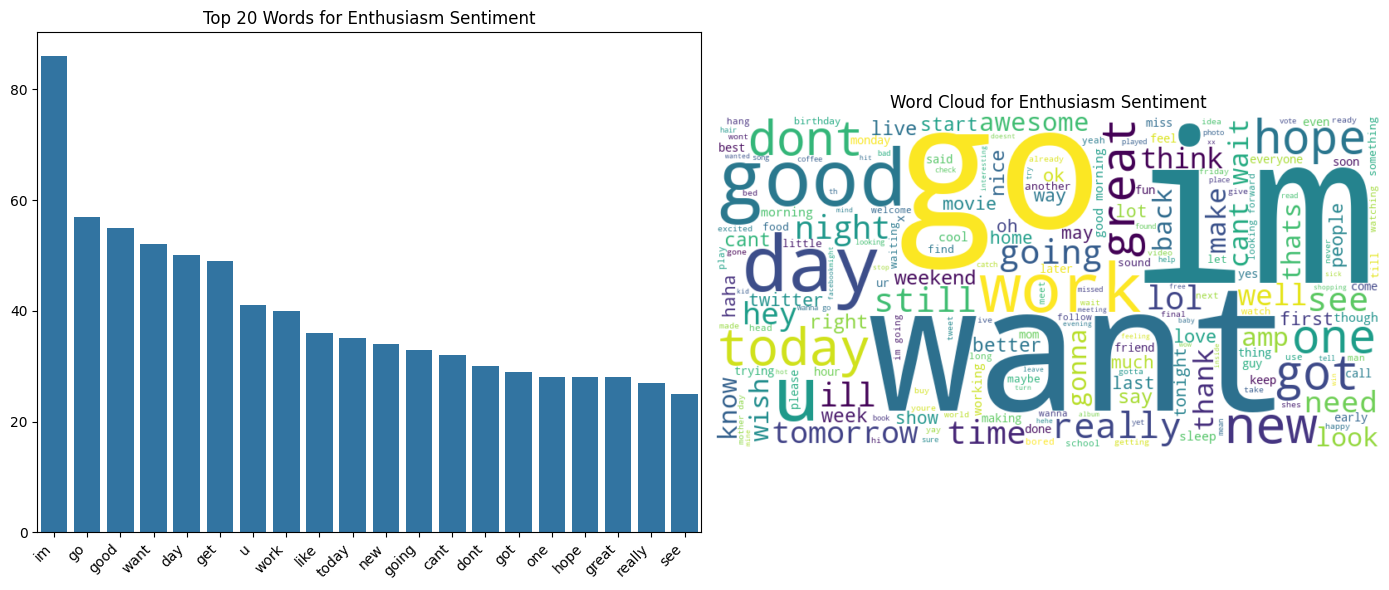

C:\Users\USER\AppData\Local\Temp\ipykernel_8220\1996173018.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(words, rotation=45, ha='right')


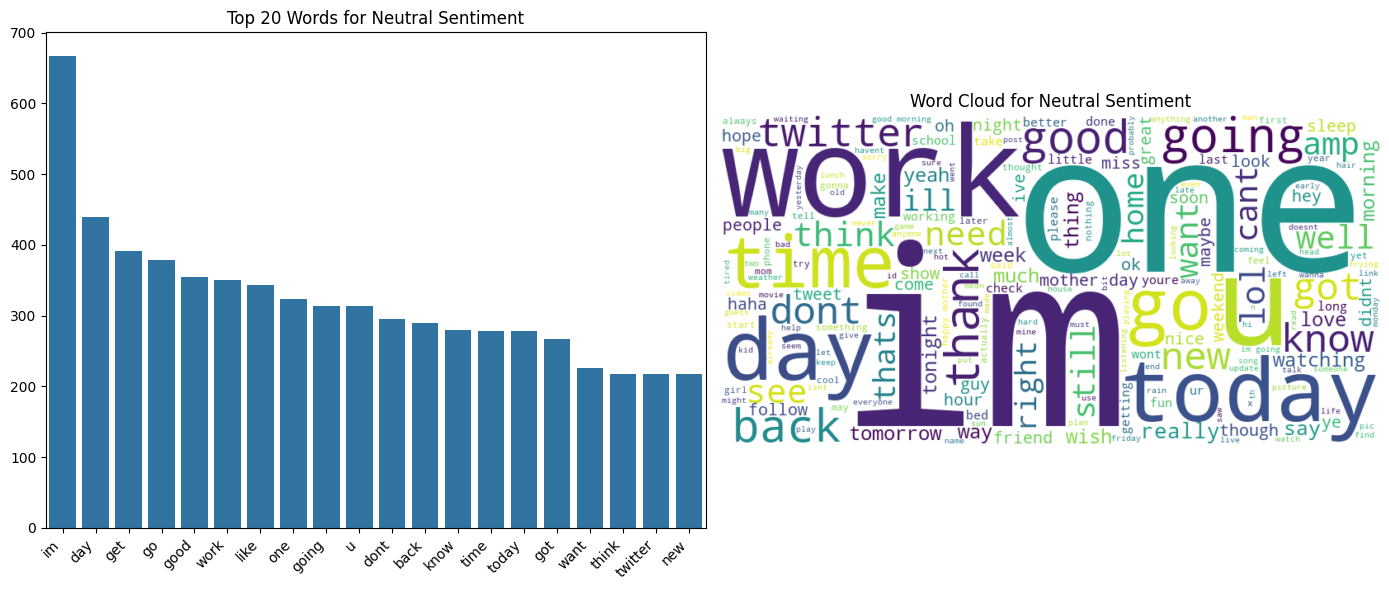

C:\Users\USER\AppData\Local\Temp\ipykernel_8220\1996173018.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(words, rotation=45, ha='right')


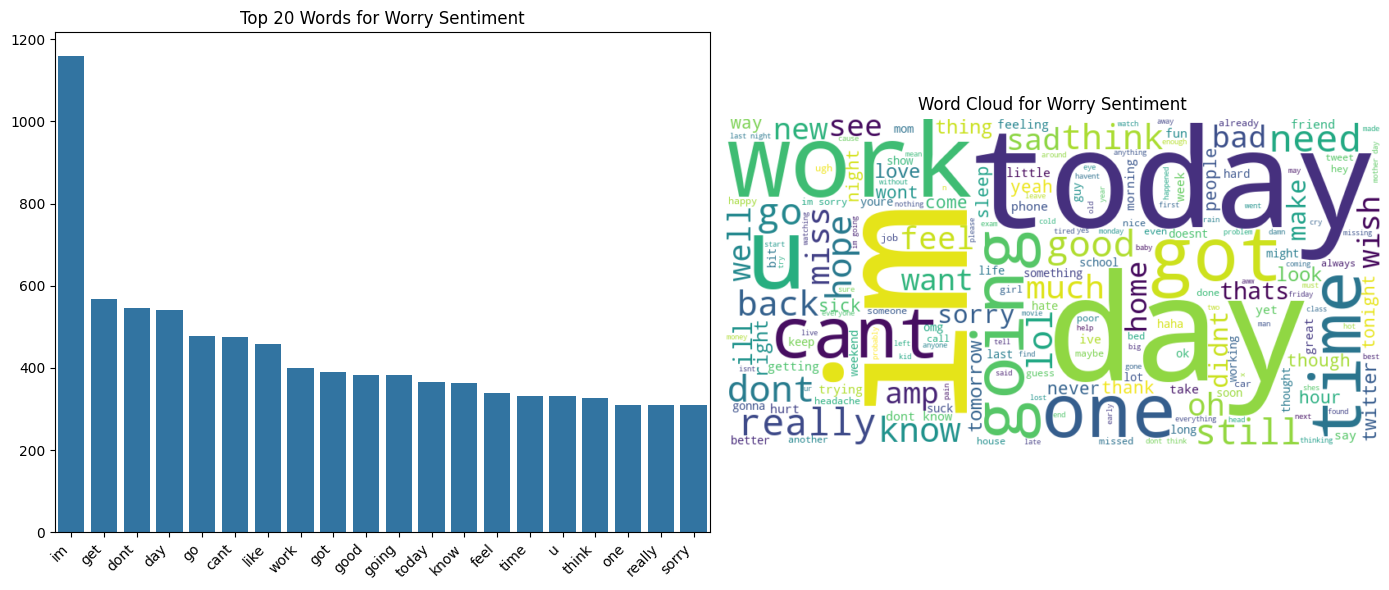

C:\Users\USER\AppData\Local\Temp\ipykernel_8220\1996173018.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(words, rotation=45, ha='right')


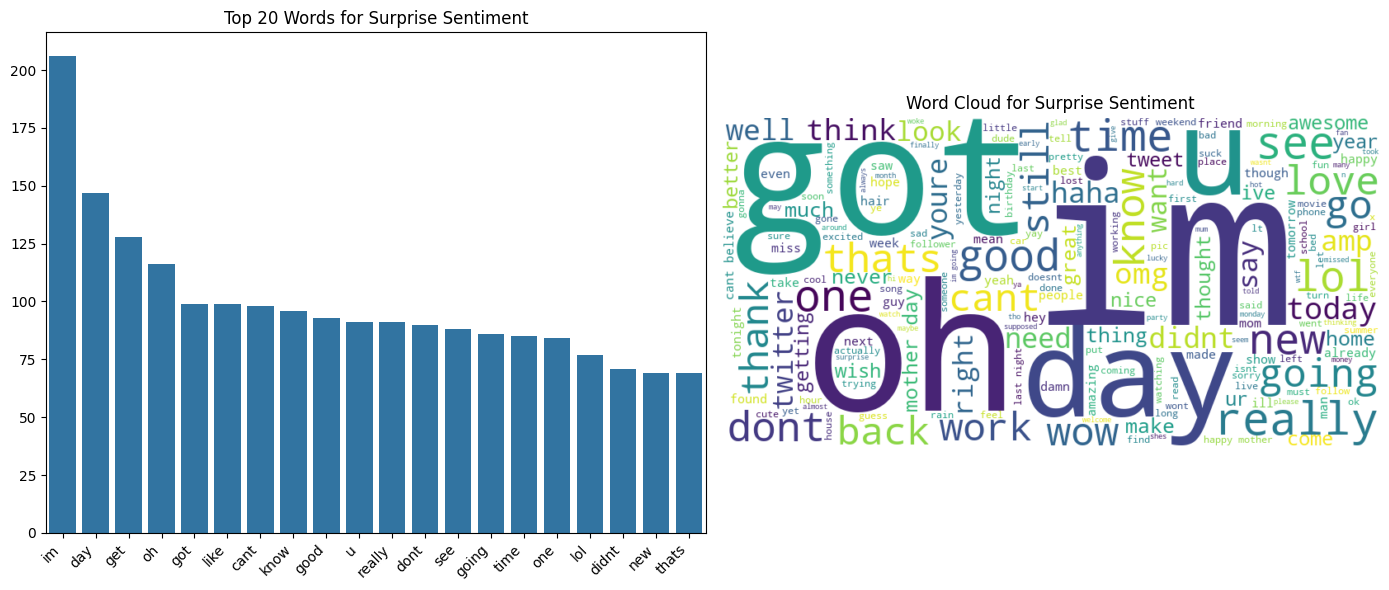

C:\Users\USER\AppData\Local\Temp\ipykernel_8220\1996173018.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(words, rotation=45, ha='right')


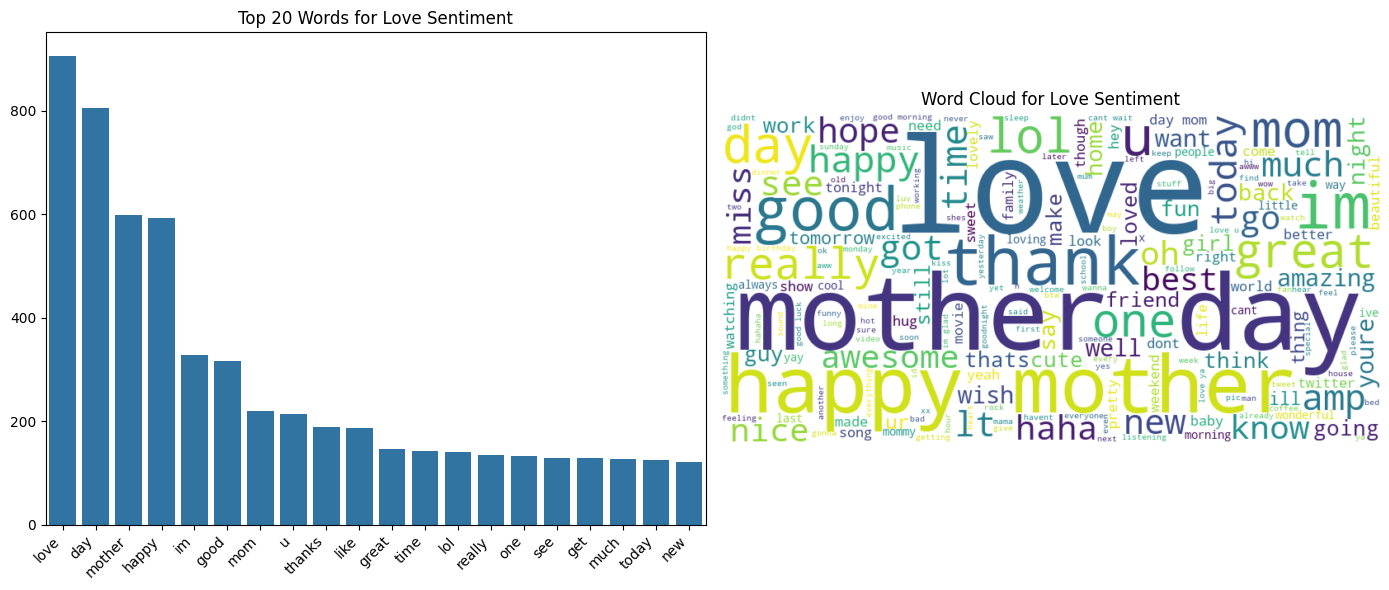

C:\Users\USER\AppData\Local\Temp\ipykernel_8220\1996173018.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(words, rotation=45, ha='right')


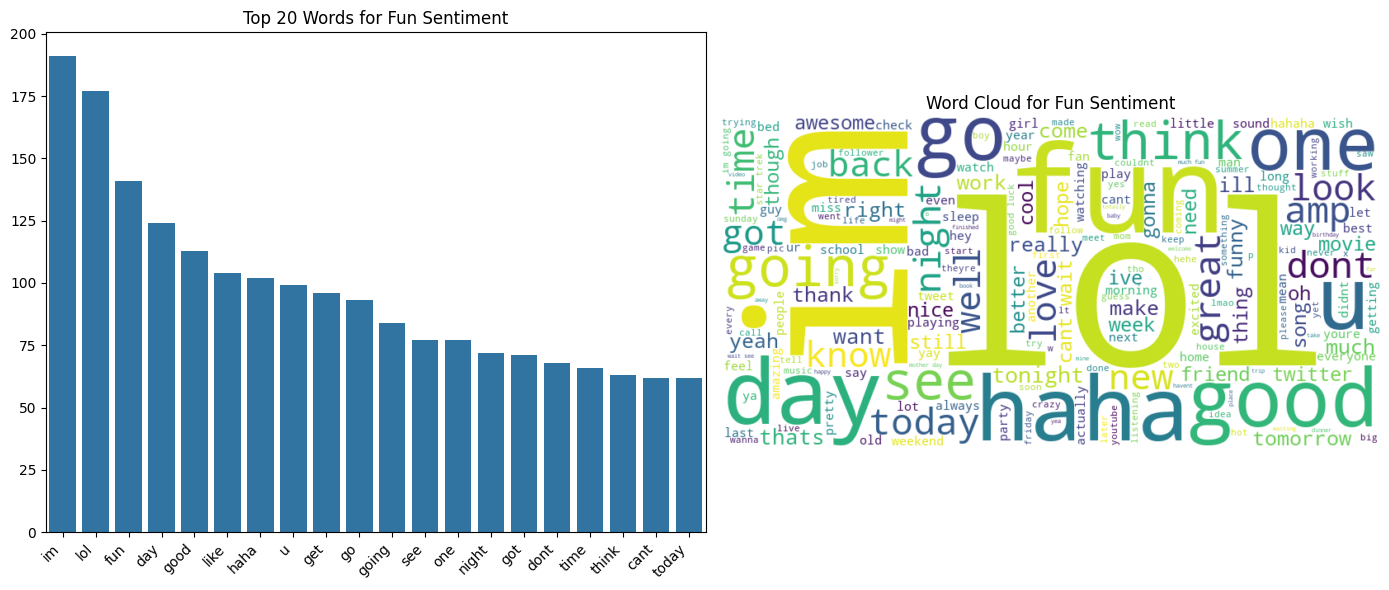

C:\Users\USER\AppData\Local\Temp\ipykernel_8220\1996173018.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(words, rotation=45, ha='right')


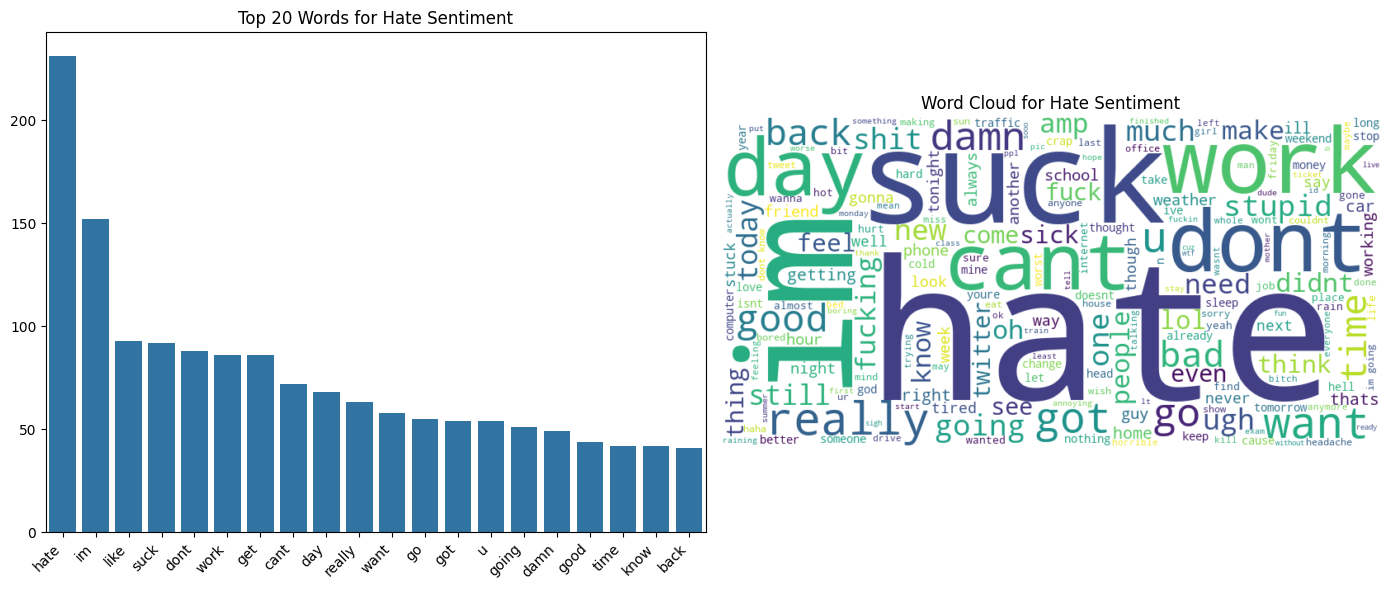

C:\Users\USER\AppData\Local\Temp\ipykernel_8220\1996173018.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(words, rotation=45, ha='right')


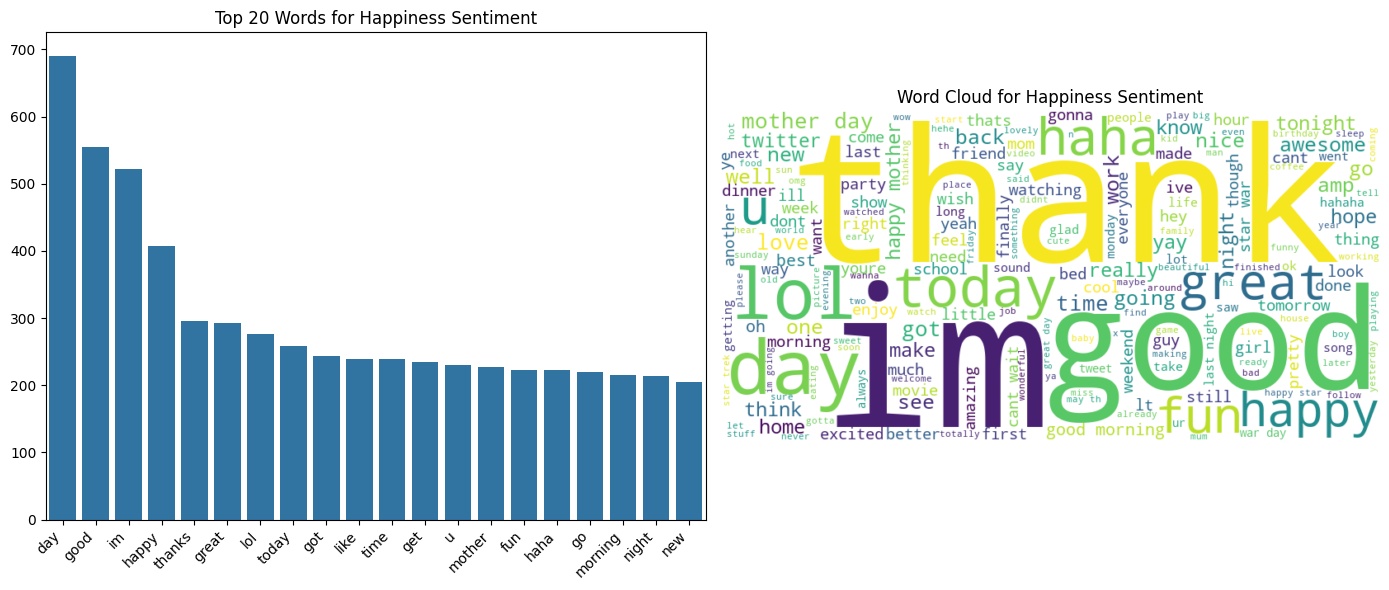

C:\Users\USER\AppData\Local\Temp\ipykernel_8220\1996173018.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(words, rotation=45, ha='right')


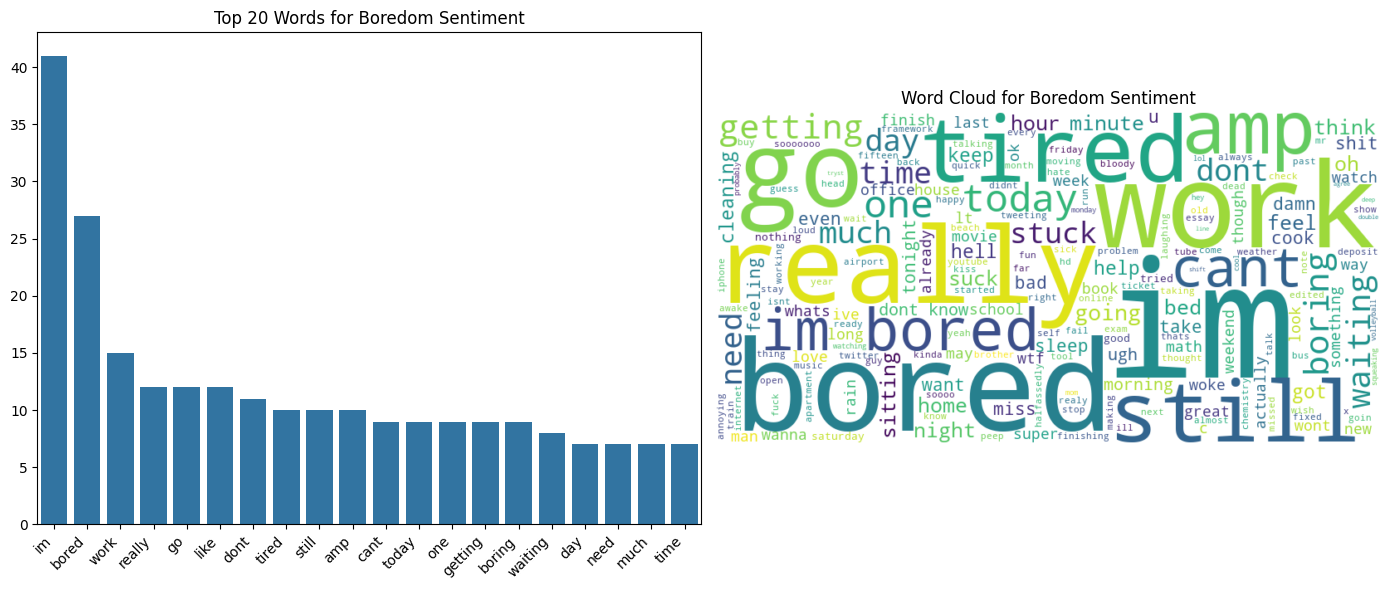

C:\Users\USER\AppData\Local\Temp\ipykernel_8220\1996173018.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(words, rotation=45, ha='right')


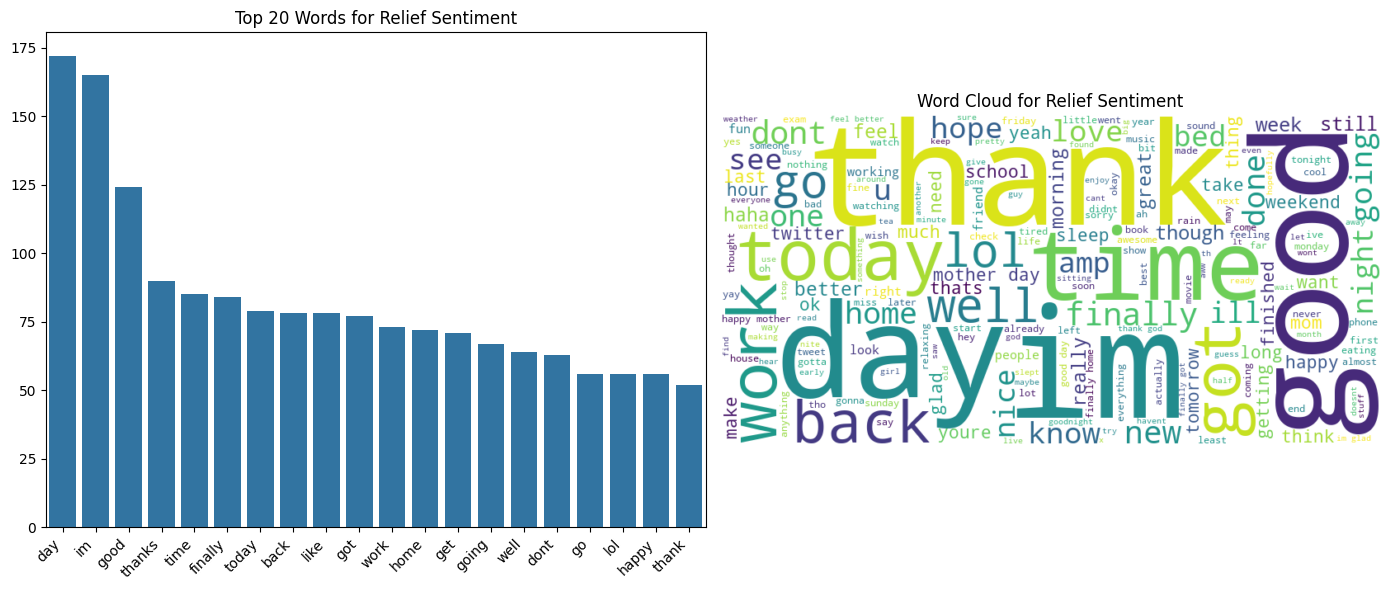

C:\Users\USER\AppData\Local\Temp\ipykernel_8220\1996173018.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(words, rotation=45, ha='right')


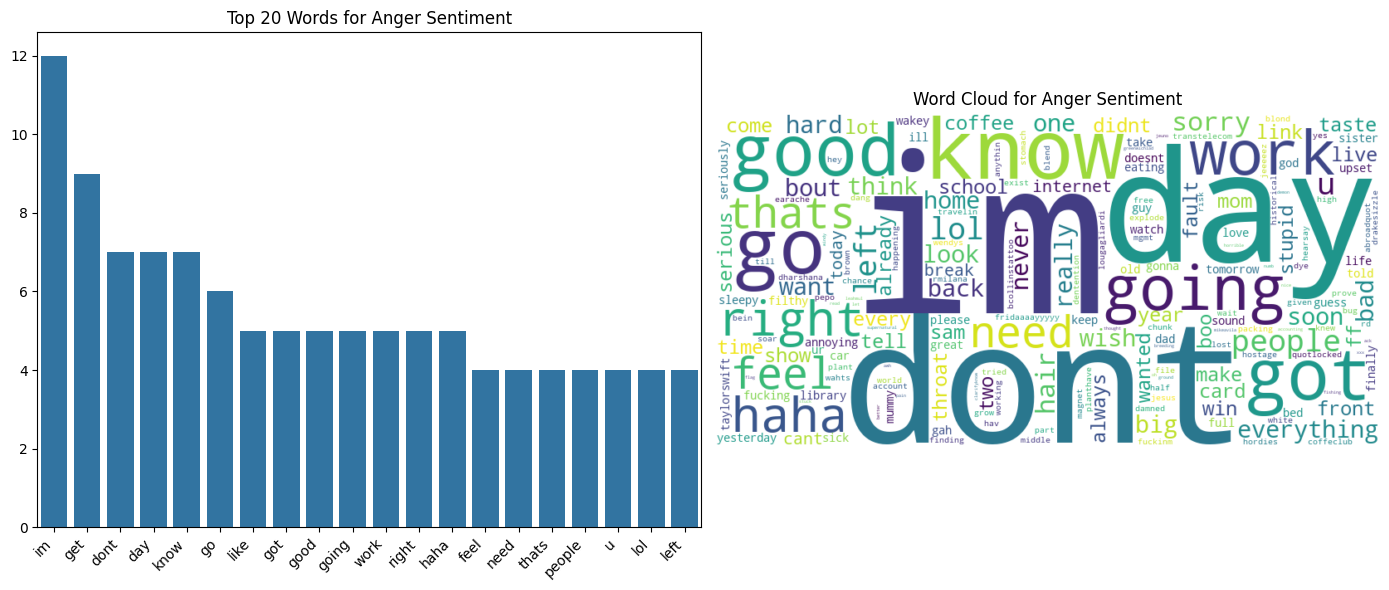

In [ ]:
for sentiment in df['sentiment'].unique():
    if pd.notna(sentiment) and sentiment != 'empty':
        sentiment_df = df[df['sentiment'] == sentiment]
        sentiment_top_words = get_top_words(sentiment_df['processed_content'])
        
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        words, counts = zip(*sentiment_top_words)
        sns.barplot(x=list(words), y=list(counts), ax=axes[0])
        axes[0].set_title(f'Top 20 Words for {sentiment.capitalize()} Sentiment')
        axes[0].set_xticklabels(words, rotation=45, ha='right')

        text = ' '.join(sentiment_df['processed_content'].dropna())
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        axes[1].imshow(wordcloud, interpolation='bilinear')
        axes[1].axis('off')
        axes[1].set_title(f'Word Cloud for {sentiment.capitalize()} Sentiment')

        plt.tight_layout()
        plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans

In [ ]:
# Filtering out rows with 'empty' sentiment
filtered_df = df[df['sentiment'] != 'empty'].dropna(subset=['processed_content', 'sentiment'])

In [ ]:
# Spliting data
X = filtered_df['processed_content']
y = filtered_df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Feature extraction
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [18]:
# Supervised learning models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': MultinomialNB()
}

In [ ]:
# Training and evaluating models
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print("="*50)

Model: Logistic Regression
Accuracy: 0.3516


C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        18
     boredom       0.00      0.00      0.00        40
  enthusiasm       0.00      0.00      0.00       158
         fun       0.20      0.02      0.04       336
   happiness       0.32      0.34      0.33      1019
        hate       0.50      0.15      0.23       295
        love       0.50      0.36      0.42       771
     neutral       0.35      0.57      0.43      1771
      relief       0.29      0.04      0.07       293
     sadness       0.33      0.23      0.27      1043
    surprise       0.26      0.05      0.08       397
       worry       0.34      0.48      0.40      1694

    accuracy                           0.35      7835
   macro avg       0.26      0.19      0.19      7835
weighted avg       0.34      0.35      0.32      7835

Model: Random Forest
Accuracy: 0.3405
              precision    recall  f1-score   support

       anger       0.00      0.00      0

C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

Model: SVM
Accuracy: 0.3526
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        18
     boredom       0.00      0.00      0.00        40
  enthusiasm       0.00      0.00      0.00       158
         fun       0.00      0.00      0.00       336
   happiness       0.33      0.34      0.34      1019
        hate       0.52      0.17      0.25       295
        love       0.51      0.36      0.42       771
     neutral       0.34      0.59      0.43      1771
      relief       0.44      0.04      0.07       293
     sadness       0.37      0.17      0.23      1043
    surprise       0.38      0.03      0.05       397
       worry       0.33      0.50      0.40      1694

    accuracy                           0.35      7835
   macro avg       0.27      0.18      0.18      7835
weighted avg       0.35      0.35      0.31      7835

Model: Naive Bayes
Accuracy: 0.3216


C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        18
     boredom       0.00      0.00      0.00        40
  enthusiasm       0.00      0.00      0.00       158
         fun       0.00      0.00      0.00       336
   happiness       0.34      0.25      0.28      1019
        hate       1.00      0.01      0.01       295
        love       0.51      0.24      0.33       771
     neutral       0.32      0.54      0.40      1771
      relief       0.00      0.00      0.00       293
     sadness       0.34      0.11      0.16      1043
    surprise       0.33      0.00      0.01       397
       worry       0.30      0.60      0.40      1694

    accuracy                           0.32      7835
   macro avg       0.26      0.14      0.13      7835
weighted avg       0.33      0.32      0.27      7835



C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Validating with hypothetical data

In [ ]:
hypothetical_texts = [
    "I am so happy today! Everything is going well.",
    "This is the worst day ever. I hate everything.",
    "Just bought some groceries and now heading home.",
    "I'm feeling a bit anxious about tomorrow's presentation.",
    "The sunset looks beautiful tonight."
]

### Processing and predicting sentiment for hypothetical texts

In [ ]:
hypothetical_processed = [clean_text(text) for text in hypothetical_texts]
hypothetical_processed = [remove_stopwords_and_lemmatize(text) for text in hypothetical_processed]
hypothetical_tfidf = tfidf_vectorizer.transform(hypothetical_processed)

In [ ]:
best_model = models['Logistic Regression'] 
hypothetical_predictions = best_model.predict(hypothetical_tfidf)

for text, prediction in zip(hypothetical_texts, hypothetical_predictions):
    print(f"Text: {text}")
    print(f"Predicted sentiment: {prediction}")
    print()

Text: I am so happy today! Everything is going well.
Predicted sentiment: happiness

Text: This is the worst day ever. I hate everything.
Predicted sentiment: hate

Text: Just bought some groceries and now heading home.
Predicted sentiment: neutral

Text: I'm feeling a bit anxious about tomorrow's presentation.
Predicted sentiment: worry

Text: The sunset looks beautiful tonight.
Predicted sentiment: happiness



### Unsupervised learning (clustering)

In [ ]:
kmeans = KMeans(n_clusters=len(filtered_df['sentiment'].unique()), random_state=42)
clusters = kmeans.fit_predict(X_train_tfidf)

# Analyze clusters
cluster_df = pd.DataFrame({'text': X_train.values, 'cluster': clusters, 'actual_sentiment': y_train.values})

for cluster in range(kmeans.n_clusters):
    cluster_texts = cluster_df[cluster_df['cluster'] == cluster]['text'].values[:5]
    cluster_sentiments = cluster_df[cluster_df['cluster'] == cluster]['actual_sentiment'].value_counts()
    
    print(f"Cluster {cluster}:")
    print(f"Dominant sentiment: {cluster_sentiments.idxmax()} ({cluster_sentiments.max()/cluster_sentiments.sum()*100:.2f}%)")
    print("Sample texts:")
    for i, text in enumerate(cluster_texts, 1):
        print(f"{i}. {text}")
    print("="*50)

Cluster 0:
Dominant sentiment: worry (27.32%)
Sample texts:
1. pause tv im minute behind bgt
2. getting hair cut todayyyy im nerrrvous
3. twiztidrose im digging twitter picture
4. jaisey aloha jaisey im excited supernatural back tv tonight jensen fest tonite
5. krissylin youre busy bob im jealous im sure even afford go meet john de lancie leonard nimoy
Cluster 1:
Dominant sentiment: neutral (25.29%)
Sample texts:
1. tummy hurt
2. usher guy made mother day really awesome today thanks coming early prep surprise gift mom
3. update
4. porter making sad panda
5. mate megan best thing since sliced bread loveeee
Cluster 2:
Dominant sentiment: love (48.63%)
Sample texts:
1. happy momma day beautiful mom therecant wait get pampered tomorrow
2. veronica gonna rock stage tomorrow happy mother day everyone
3. mother day
4. happy mother day show love beautiful amazing mom lt
5. ut ok think take attitude mother day invented hallmark holiday
Cluster 3:
Dominant sentiment: worry (26.14%)
Sample texts:

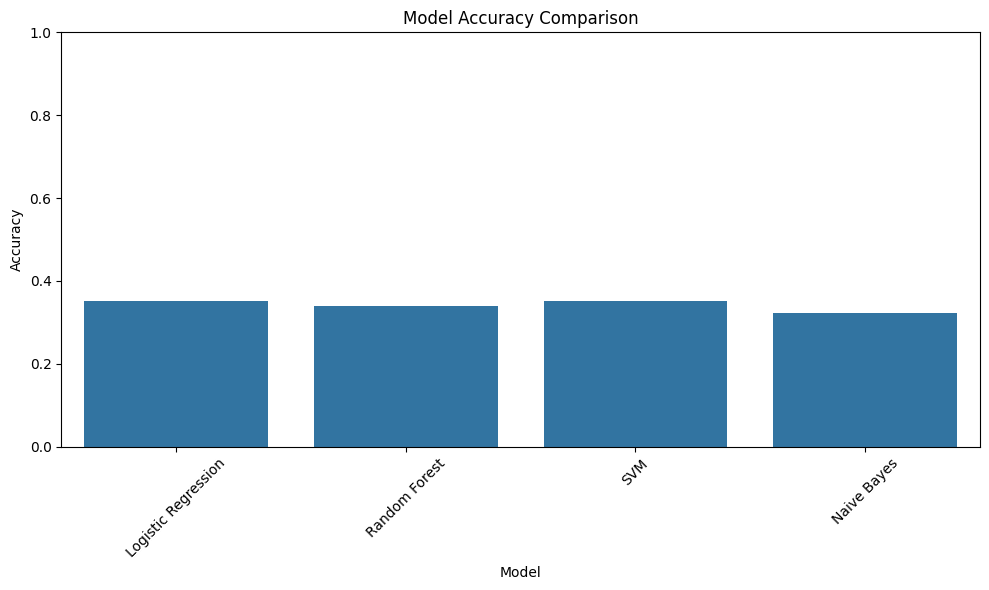

In [ ]:

# Comparing model performances
model_names = list(models.keys())
model_accuracies = []

for name, model in models.items():
    y_pred = model.predict(X_test_tfidf)
    model_accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=model_accuracies)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### plotting a confusion matrix for the best model

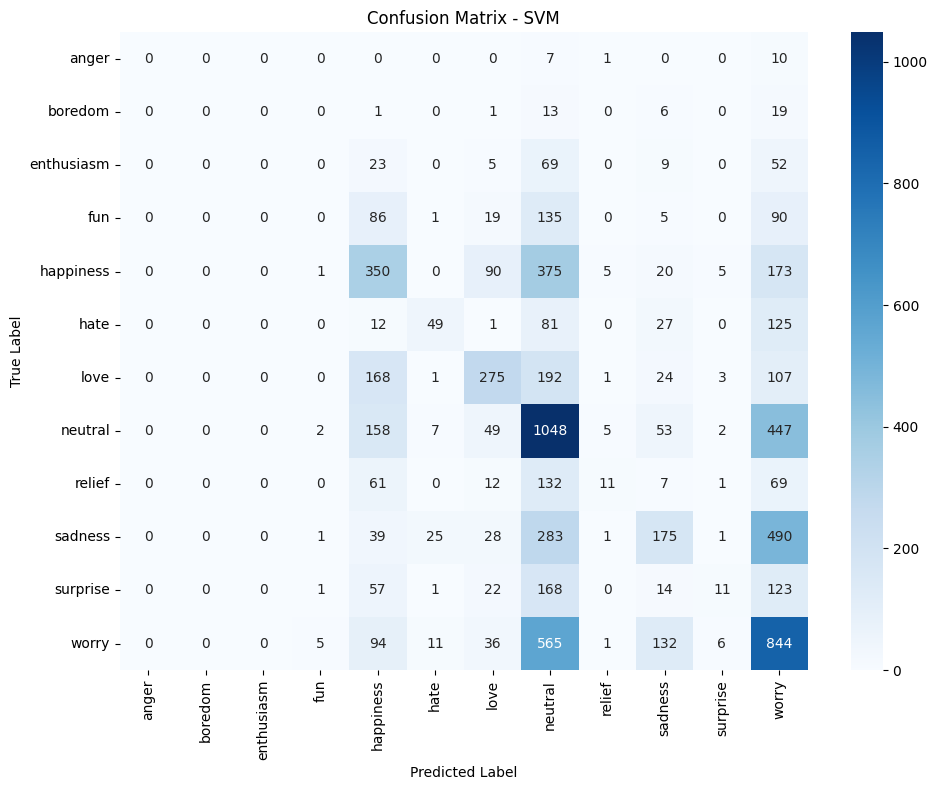

In [ ]:
from sklearn.metrics import confusion_matrix
best_model_name = model_names[np.argmax(model_accuracies)]
best_model = models[best_model_name]
y_pred = best_model.predict(X_test_tfidf)

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(y.unique()), 
            yticklabels=sorted(y.unique()))
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()